In [19]:
import pandas as pd
import matplotlib.pyplot as plt
startups=pd.read_excel("startups.xlsx")
startups.head()

,rd,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


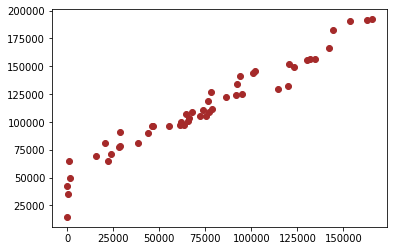

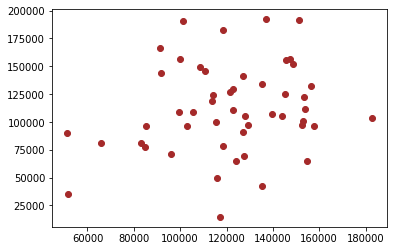

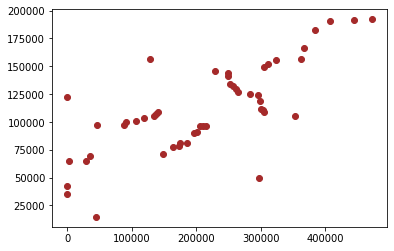

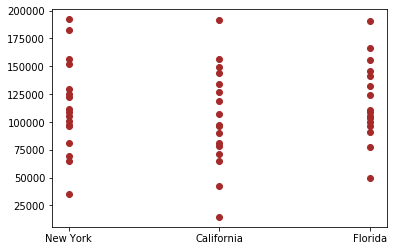

In [101]:
#EDA
startups.shape
startups.dtypes
startups.isna
startups.describe()


plt.scatter(x=startups['rd'],y=startups['profit'],color="brown")
plt.show()
plt.scatter(x=startups['admin'],y=startups['profit'],color="brown")
plt.show()
plt.scatter(x=startups['marketing'],y=startups['profit'],color="brown")
plt.show()
plt.scatter(x=startups['state'],y=startups['profit'],color="brown")
plt.show()

In [35]:
#creating dummy variables for state column
dummy=pd.get_dummies(startups.state)
dummy.columns="california","florida","ny"
startups = pd.concat([startups,dummy],axis=1)
startups.head()

,rd,admin,marketing,state,profit,california,florida,ny,california,florida,ny
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0,0,1,0


In [36]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
train,test = train_test_split(startups,test_size=0.3)

In [39]:
#training the data model using train data set
import statsmodels.formula.api as slm
model1 = slm.ols('profit~rd+admin+marketing+california+florida+ny',data=train).fit()
model1.summary() #R^2 0.962

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.15e-19
Time:                        23:43:33   Log-Likelihood:                -366.77
No. Observations:                  35   AIC:                             745.5
Df Residuals:                      29   BIC:                             754.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.019e+04   4715.733      6.401      0.000    2.05e+04    3.98e+04
rd                0.8490      0.053     16.050      0.000       0.741       0.957
admin            -0.0584      0.061     -0.960      0.345      -0.183       0.066
marketing         0.0292      0.020      1.480      0.150      -0.011       0.070
california[0]  9606.2598   1865.200      5.150      0.000    5791.498    1.34e+04
california[1]  9606.2598   1865.200      5.150      0.000    5791.498    1.34e+04
florida[0]     9588.8073   2095.266      4.576      0.000    5303.506    1.39e+04
florida[1]     9588.8073   2095.266      4.576      0.000    5303.506    1.39e+04
ny[0]          1.099e+04   1884.446      5.833      0.000    7136.918    1.48e+04
ny[1]          1.099e+04   1884.446      5.833      0.000    7136.918    1.48e+04
==============================================================================
Omnibus:                       12.933   Durbin-Watson:                   2.831
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.545
Skew:                          -1.166   Prob(JB):                      0.00115
Kurtosis:                       4.962   Cond. No.                     8.75e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.63e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
#finding collinearity / vif values
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns

#calculating vif values for Model1
rsq_rd=slm.ols('rd~admin+marketing+california+florida+ny',data=train).fit().rsquared
vif_rd=1/(1-rsq_rd) #2.566
vif_rd

rsq_ad=slm.ols('admin~rd+marketing+california+florida+ny',data=train).fit().rsquared
vif_ad=1/(1-rsq_ad) #1.2447
vif_ad

rsq_mar=slm.ols('marketing~rd+admin+california+florida+ny',data=train).fit().rsquared
vif_mar=1/(1-rsq_mar) #2.438
vif_mar

rsq_cal=slm.ols('california~rd+admin+marketing+florida+ny',data=train).fit().rsquared
vif_cal=1/(1-rsq_cal) #infinty
vif_cal 

rsq_flo=slm.ols('florida~rd+admin+marketing+california+ny',data=train).fit().rsquared
vif_flo=1/(1-rsq_flo) #infinity
vif_flo

rsq_ny=slm.ols('newyork~rd+admin+marketing+california+florida',data=train).fit().rsquared
vif_ny=1/(1-rsq_ny) #infinity
vif_ny

ValueError: shapes (35,2) and (35,2) not aligned: 2 (dim 1) != 35 (dim 0)

In [88]:
#Model 2
#removing new york variable

model2=slm.ols('profit~rd+admin+marketing+california+florida',data=train).fit()
model2.summary() #R^2 <- 0.962

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     146.7
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.15e-19
Time:                        00:12:10   Log-Likelihood:                -366.77
No. Observations:                  35   AIC:                             745.5
Df Residuals:                      29   BIC:                             754.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.217e+04   8030.832      6.496      0.000    3.57e+04    6.86e+04
rd                0.8490      0.053     16.050      0.000       0.741       0.957
admin            -0.0584      0.061     -0.960      0.345      -0.183       0.066
marketing         0.0292      0.020      1.480      0.150      -0.011       0.070
california[0] -1384.7836   1937.082     -0.715      0.480   -5346.560    2576.993
california[1] -1384.7836   1937.082     -0.715      0.480   -5346.560    2576.993
florida[0]    -1402.2361   2072.579     -0.677      0.504   -5641.136    2836.664
florida[1]    -1402.2361   2072.579     -0.677      0.504   -5641.136    2836.664
==============================================================================
Omnibus:                       12.933   Durbin-Watson:                   2.831
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.545
Skew:                          -1.166   Prob(JB):                      0.00115
Kurtosis:                       4.962   Cond. No.                     1.54e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [89]:
#calculating vif values for Model2 

rsq_rd=slm.ols('rd~admin+marketing+california+florida',data=train).fit().rsquared
vif_rd=1/(1-rsq_rd) #2.5668
vif_rd

rsq_ad=slm.ols('admin~rd+marketing+california+florida',data=train).fit().rsquared
vif_ad=1/(1-rsq_ad) #1.244
vif_ad

rsq_mar=slm.ols('marketing~rd+admin+california+florida',data=train).fit().rsquared
vif_mar=1/(1-rsq_mar) #2.4384
vif_mar

rsq_cal=slm.ols('california~rd+admin+marketing+florida',data=train).fit().rsquared
vif_cal=1/(1-rsq_cal)
vif_cal


rsq_flo=slm.ols('florida~rd+admin+marketing+california',data=train).fit().rsquared
vif_flo=1/(1-rsq_flo)
vif_flo

ValueError: shapes (35,2) and (35,2) not aligned: 2 (dim 1) != 35 (dim 0)

In [90]:
#Model3 
#remove florida variable as it has the highest p value

model3=slm.ols('profit~rd+admin+marketing+california',data=train).fit()
model3.summary() #R^2 <- 0.961

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     186.6
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           9.84e-21
Time:                        00:12:22   Log-Likelihood:                -367.05
No. Observations:                  35   AIC:                             744.1
Df Residuals:                      30   BIC:                             751.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.141e+04   7880.957      6.524      0.000    3.53e+04    6.75e+04
rd                0.8503      0.052     16.232      0.000       0.743       0.957
admin            -0.0602      0.060     -0.999      0.326      -0.183       0.063
marketing         0.0268      0.019      1.394      0.173      -0.012       0.066
california[0]  -719.9747   1654.197     -0.435      0.667   -4098.295    2658.346
california[1]  -719.9747   1654.197     -0.435      0.667   -4098.295    2658.346
==============================================================================
Omnibus:                       13.534   Durbin-Watson:                   2.760
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.563
Skew:                          -1.200   Prob(JB):                     0.000688
Kurtosis:                       5.057   Cond. No.                     1.68e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.82e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [91]:
#VIf values for Model 3

rsq_rd=slm.ols('rd~admin+marketing+california',data=train).fit().rsquared
vif_rd=1/(1-rsq_rd) #2.5635
vif_rd

rsq_ad=slm.ols('admin~rd+marketing+california',data=train).fit().rsquared
vif_ad=1/(1-rsq_ad) #1.242
vif_ad

rsq_mar=slm.ols('marketing~rd+admin+california',data=train).fit().rsquared
vif_mar=1/(1-rsq_mar) #2.3609
vif_mar

rsq_cal=slm.ols('california~rd+admin+marketing',data=train).fit().rsquared
vif_cal=1/(1-rsq_cal)
vif_cal

ValueError: shapes (35,2) and (35,2) not aligned: 2 (dim 1) != 35 (dim 0)

In [92]:
#Model4
#remove california variable

model4=slm.ols('profit~rd+admin+marketing',data=train).fit()
model4.summary() #R^2 <- 0.961

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     255.4
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           6.17e-22
Time:                        00:12:34   Log-Likelihood:                -367.16
No. Observations:                  35   AIC:                             742.3
Df Residuals:                      31   BIC:                             748.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.072e+04   7617.455      6.659      0.000    3.52e+04    6.63e+04
rd             0.8500      0.052     16.443      0.000       0.745       0.955
admin         -0.0601      0.059     -1.012      0.319      -0.181       0.061
marketing      0.0277      0.019      1.465      0.153      -0.011       0.066
==============================================================================
Omnibus:                       14.512   Durbin-Watson:                   2.708
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.772
Skew:                          -1.220   Prob(JB):                     0.000228
Kurtosis:                       5.355   Cond. No.                     1.37e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
#VIf values for Model 4

rsq_rd=slm.ols('rd~admin+marketing',data=train).fit().rsquared
vif_rd=1/(1-rsq_rd) #2.5629
vif_rd

rsq_ad=slm.ols('admin~rd+marketing',data=train).fit().rsquared
vif_ad=1/(1-rsq_ad) #1.2424
vif_ad

rsq_mar=slm.ols('marketing~rd+admin',data=train).fit().rsquared
vif_mar=1/(1-rsq_mar) #2.337
vif_mar



2.337228023034393

In [93]:
#Model5
#remove admin variable as it has a high p value

model5=slm.ols('profit~rd+marketing',data=train).fit()
model5.summary() #R^2 <- 0.960

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     382.4
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           4.59e-23
Time:                        00:12:46   Log-Likelihood:                -367.72
No. Observations:                  35   AIC:                             741.4
Df Residuals:                      32   BIC:                             746.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.371e+04   3155.717     13.850      0.000    3.73e+04    5.01e+04
rd             0.8269      0.046     17.822      0.000       0.732       0.921
marketing      0.0342      0.018      1.927      0.063      -0.002       0.070
==============================================================================
Omnibus:                       13.592   Durbin-Watson:                   2.694
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.498
Skew:                          -1.139   Prob(JB):                     0.000431
Kurtosis:                       5.331   Cond. No.                     5.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
#VIf values for Model 5

rsq_rd=slm.ols('rd~marketing',data=train).fit().rsquared
vif_rd=1/(1-rsq_rd) #2.063
vif_rd

rsq_mar=slm.ols('marketing~rd',data=train).fit().rsquared
vif_mar=1/(1-rsq_mar) #2.063
vif_mar



2.063329428145005

In [97]:
#Model6
#remov marketing variable as it has a high p value

model6=slm.ols('profit~rd',data=train).fit()
model6.summary() #R^2 <- 0.955



2.063329428145005

In [100]:

#predicting using train data#
import numpy as np
predict_train=model6.predict(train)
err_train=train.profit-predict_train
rmse_train=np.sqrt(np.mean(err_train*err_train))
rmse_train #9342.54


predict_test=model6.predict(test)
err_test=test.profit-predict_test
rmse_test=np.sqrt(np.mean(err_test*err_test))
rmse_test #9475.89

9475.897764931862